In [1]:
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
global_save_image=False
directorio_de_imagenes="/Users/leonardoomarbolanosrivera/MAESTRIA/SEMESTRE3/MACHINE_LEARNING/repository/Proyecto_final/IMAGENES/MODELOS/UNSUPERVISED"
directorios_de_datos="../../data/processed"

In [3]:
# Reading data and removing index col
df = pd.read_csv(f"{directorios_de_datos}/DataAnalyst_preprocesado_reduced_cardinality.csv")
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Salary Estimate Min,Salary Estimate Max,Salary Estimate Mean,Sentences in Job Description,Location State,Headquarters Country,Headquarters Country2,Job Title Cat
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),37.0,66.0,51.5,48,NY,United States,United States,Associate Data Analyst
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),37.0,66.0,51.5,48,NY,United States,United States,Associate Data Analyst
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,37.0,66.0,51.5,24,NY,United States,United States,Senior Data Analyst
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),37.0,66.0,51.5,28,NY,United States,United States,Associate Data Analyst
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),37.0,66.0,51.5,13,NY,United States,United States,Associate Data Analyst


In [4]:
df["salaries cat"]=pd.cut(df["Salary Estimate Mean"],bins=[0,70,80,float('Inf')], labels=['Low','Medium','High'] )

In [5]:
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,Revenue,Salary Estimate Min,Salary Estimate Max,Salary Estimate Mean,Sentences in Job Description,Location State,Headquarters Country,Headquarters Country2,Job Title Cat,salaries cat
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,...,$100 to $500 million (USD),37.0,66.0,51.5,48,NY,United States,United States,Associate Data Analyst,Low
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,...,$2 to $5 billion (USD),37.0,66.0,51.5,48,NY,United States,United States,Associate Data Analyst,Low
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,...,Unknown / Non-Applicable,37.0,66.0,51.5,24,NY,United States,United States,Senior Data Analyst,Low
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,...,$50 to $100 million (USD),37.0,66.0,51.5,28,NY,United States,United States,Associate Data Analyst,Low
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,...,$100 to $500 million (USD),37.0,66.0,51.5,13,NY,United States,United States,Associate Data Analyst,Low


In [6]:
df.shape

(2253, 21)

In [ ]:
#df.to_csv(f'{directorios_de_datos}/DataAnalyst_preprocesado_final.csv', index=False)

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
pca_2D = PCA(2)
umap_2D = umap.UMAP(random_state=42,n_components=2)
tsne_2D = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3,random_state=42)

In [9]:
pca_3D = PCA(3)
umap_3D = umap.UMAP(random_state=42,n_components=3)
tsne_3D = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=3,random_state=42)

In [10]:
features_columnas_categoricas = ['Job Title','Company Name','Location','Headquarters','Size','Founded','Type of ownership','Industry','Sector','Revenue']
variables_numericas = ['Salary Estimate Max','Sentences in Job Description']
all_vars= features_columnas_categoricas + variables_numericas
X = df[all_vars[0:len(all_vars)]]
one_hot_encoder = OneHotEncoder()
# passthrough significa que no modifique las otras columnas
transformed_Using_Salary_Estimate_Mean = ColumnTransformer([("one_hot",
                                  one_hot_encoder,
                                  features_columnas_categoricas)],
                                  remainder='passthrough')

transformed_X_Using_Salary_Estimate_Mean = transformed_Using_Salary_Estimate_Mean.fit_transform(X)

#

In [11]:
features_columnas_categoricas = ['Job Title','Company Name','Location','Headquarters','Size','Founded','Type of ownership','Industry','Sector','Revenue','salaries cat']
variables_numericas = ['Sentences in Job Description']
all_vars= features_columnas_categoricas + variables_numericas
X = df[all_vars[0:len(all_vars)]]
one_hot_encoder = OneHotEncoder()
# passthrough significa que no modifique las otras columnas
transformed_Using_calaries_cat = ColumnTransformer([("one_hot",
                                  one_hot_encoder,
                                  features_columnas_categoricas)],
                                  remainder='passthrough')

transformed_X_Using_calaries_cat = transformed_Using_calaries_cat.fit_transform(X)

In [12]:
X_reduced_PCA_2D_Using_Salary_Estimate_Mean =pca_2D.fit_transform(transformed_X_Using_Salary_Estimate_Mean)
X_embedded_UMAP_Using_Salary_Estimate_Mean = umap_2D.fit_transform(transformed_X_Using_Salary_Estimate_Mean)
X_embedded_TSNE_2D_Using_Salary_Estimate_Mean = tsne_2D.fit_transform(transformed_X_Using_Salary_Estimate_Mean)

/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [13]:
X_reduced_PCA_2D_Using_calaries_cat  =pca_2D.fit_transform(transformed_X_Using_calaries_cat)
X_embedded_UMAP_2D_Using_calaries_cat = umap_2D.fit_transform(transformed_X_Using_calaries_cat)
X_embedded_TSNE_2D_Using_calaries_cat = tsne_2D.fit_transform(transformed_X_Using_calaries_cat)

In [14]:
X_reduced_PCA_3D_Using_Salary_Estimate_Mean =pca_3D.fit_transform(transformed_X_Using_Salary_Estimate_Mean)
X_embedded_UMAP_3D_Using_Salary_Estimate_Mean = umap_3D.fit_transform(transformed_X_Using_Salary_Estimate_Mean)
X_embedded_TSNE_3D_Using_Salary_Estimate_Mean = tsne_3D.fit_transform(transformed_X_Using_Salary_Estimate_Mean)

/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [15]:
X_reduced_PCA_3D_Using_calaries_cat  =pca_3D.fit_transform(transformed_X_Using_calaries_cat)
X_embedded_UMAP_3D_Using_calaries_cat = umap_3D.fit_transform(transformed_X_Using_calaries_cat)
X_embedded_TSNE_3D_Using_calaries_cat = tsne_3D.fit_transform(transformed_X_Using_calaries_cat)

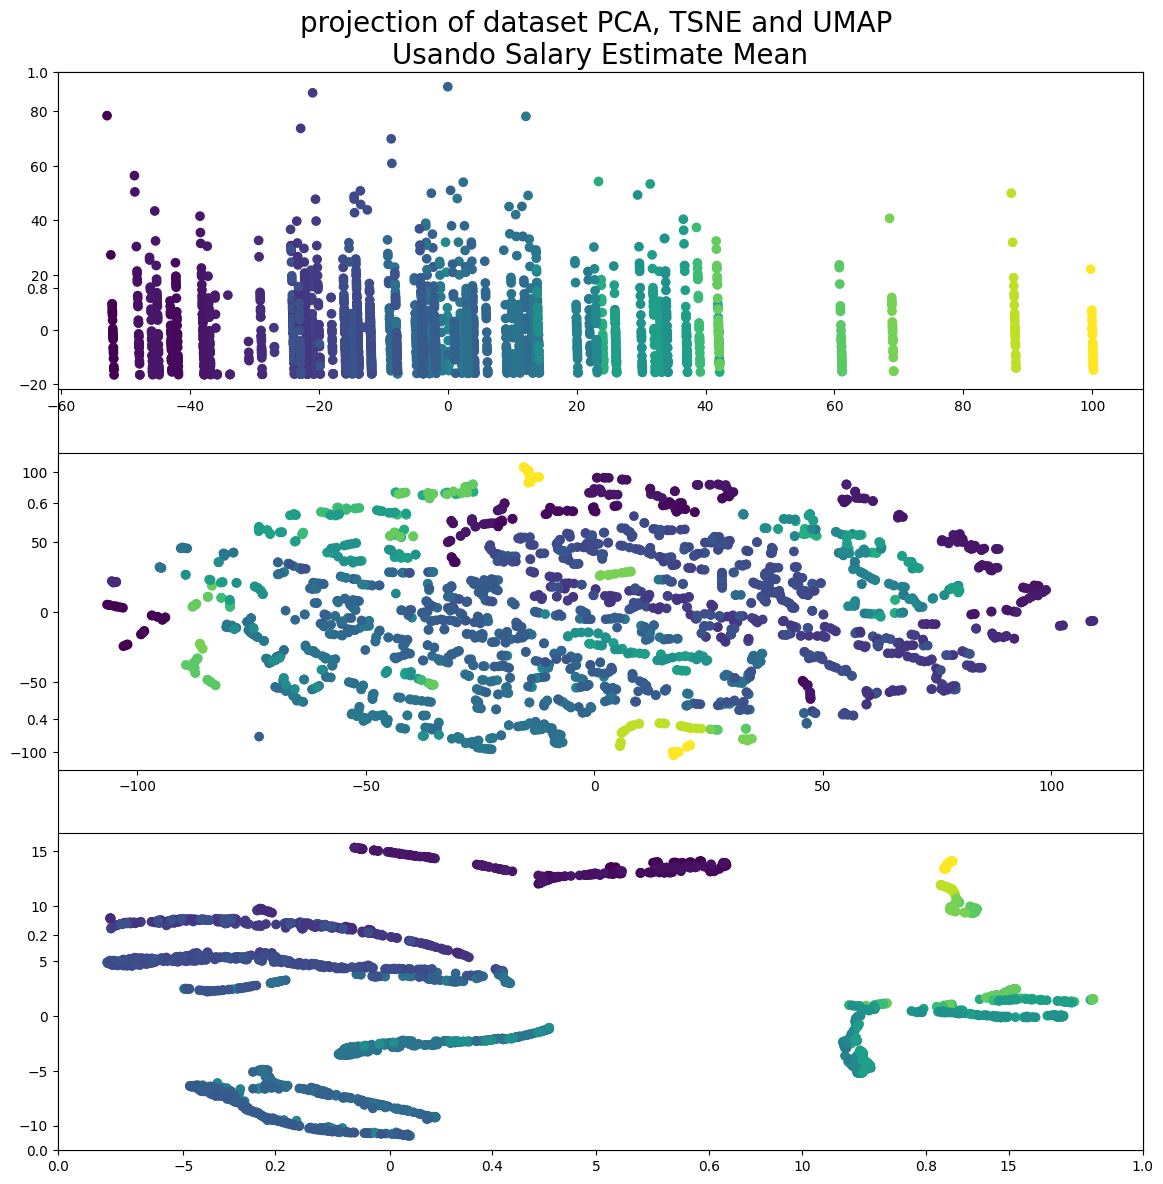

In [16]:
color_list=df["Salary Estimate Mean"].tolist()
plt.figure(figsize=(14,14))
plt.title('projection of dataset PCA, TSNE and UMAP \nUsando Salary Estimate Mean', fontsize=20)
plt.subplots_adjust(hspace=0.2)
plt.subplot(3,1,1)
plt.scatter(X_reduced_PCA_2D_Using_Salary_Estimate_Mean[:, 0], X_reduced_PCA_2D_Using_Salary_Estimate_Mean[:, 1],  c=color_list)

plt.subplot(3,1,2)

plt.scatter(X_embedded_TSNE_2D_Using_Salary_Estimate_Mean[:, 0], X_embedded_TSNE_2D_Using_Salary_Estimate_Mean[:, 1],  c=color_list)


plt.subplot(3,1,3)


plt.scatter(
    X_embedded_UMAP_Using_Salary_Estimate_Mean[:, 0],
    X_embedded_UMAP_Using_Salary_Estimate_Mean[:, 1],
    c=color_list)

if global_save_image == True :
        plt.savefig(f"{directorio_de_imagenes}/reduccion_pca_tsne_umap_2d_Estimate_mean.jpg", dpi=300, transparent=False, bbox_inches='tight')

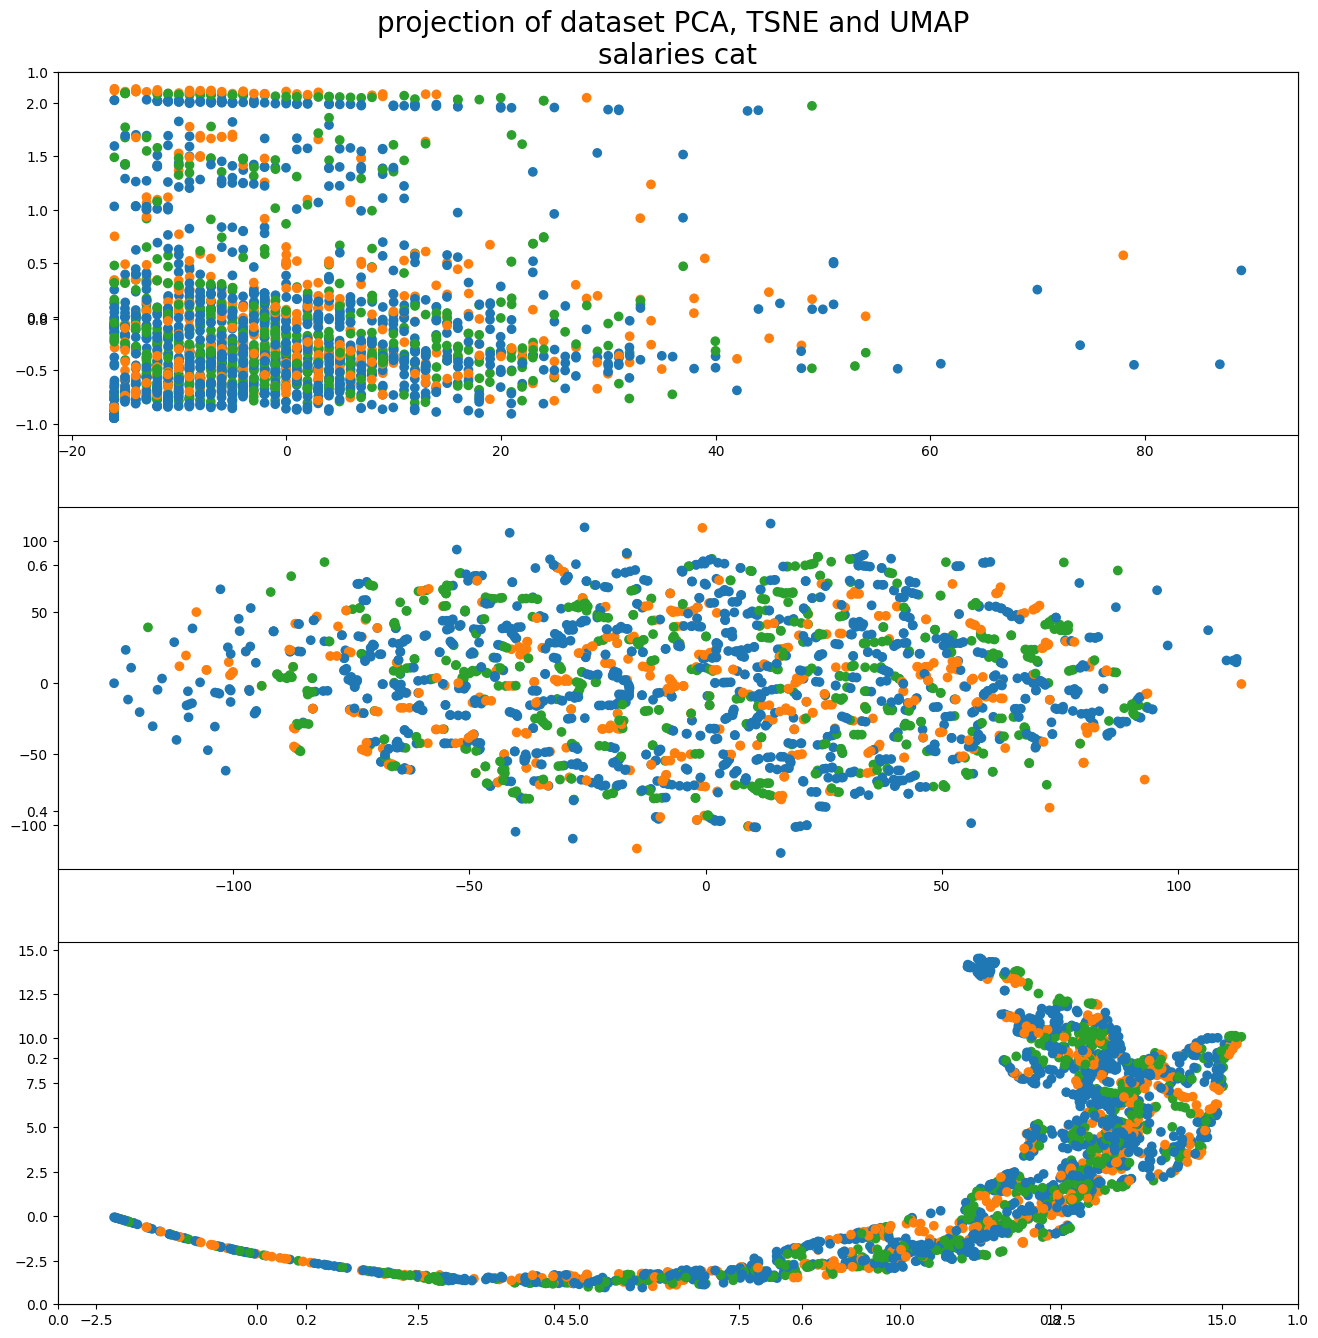

In [17]:
color_list=c=[sns.color_palette()[x] for x in df["salaries cat"].map({"Low":0, "Medium":1, "High":2})]
plt.figure(figsize=(16,16))
plt.title('projection of dataset PCA, TSNE and UMAP \nsalaries cat', fontsize=20)
plt.subplots_adjust(hspace=0.2)
plt.subplot(3,1,1)
plt.scatter(X_reduced_PCA_2D_Using_calaries_cat[:, 0], X_reduced_PCA_2D_Using_calaries_cat[:, 1],  c=color_list)

plt.subplot(3,1,2)

plt.scatter(X_embedded_TSNE_2D_Using_calaries_cat[:, 0], X_embedded_TSNE_2D_Using_calaries_cat[:, 1],  c=color_list)


plt.subplot(3,1,3)


plt.scatter(
    X_embedded_UMAP_2D_Using_calaries_cat[:, 0],
    X_embedded_UMAP_2D_Using_calaries_cat[:, 1],
    c=color_list)

if global_save_image == True :
        plt.savefig(f"{directorio_de_imagenes}/reduccion_pca_tsne_umap_2d_Salaries_cat.jpg", dpi=300, transparent=False, bbox_inches='tight')

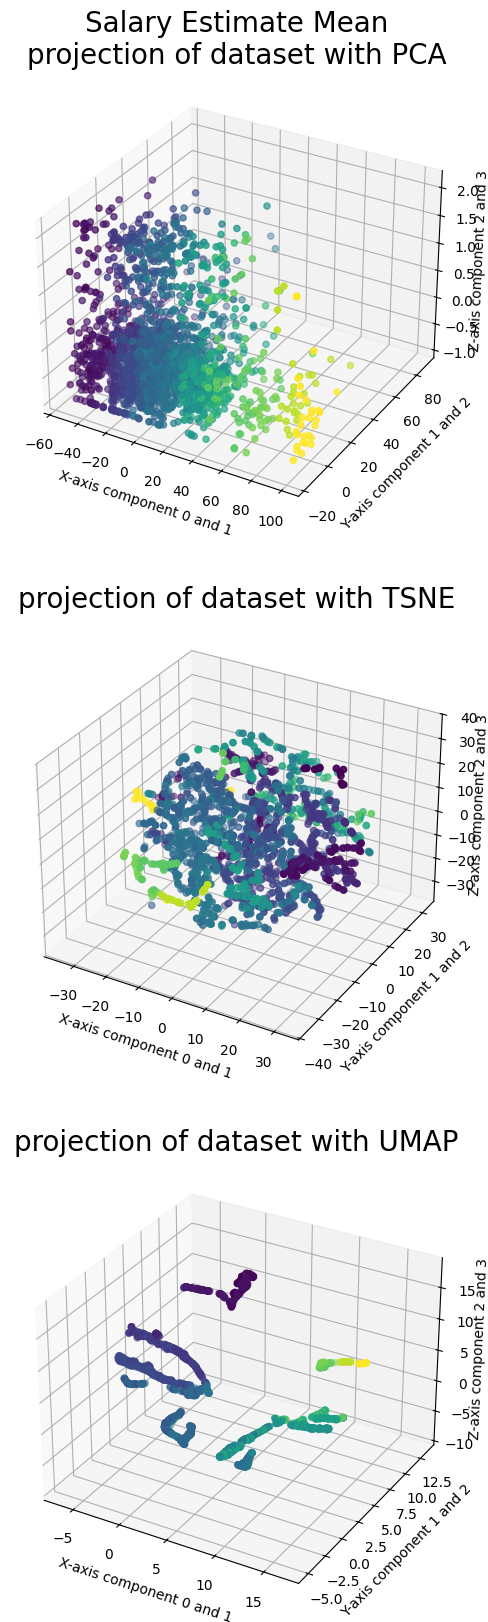

In [18]:
color_list=df["Salary Estimate Mean"].tolist()
#plt.title('projection of the Penguin dataset 3D', fontsize=20)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(3, 1, 1, projection='3d')
x_vals = X_reduced_PCA_3D_Using_Salary_Estimate_Mean[:, 0:1]
y_vals = X_reduced_PCA_3D_Using_Salary_Estimate_Mean[:, 1:2]
z_vals = X_reduced_PCA_3D_Using_Salary_Estimate_Mean[:, 2:3]
ax.scatter3D(x_vals, y_vals, z_vals,c=color_list)
ax.set_title('Salary Estimate Mean\nprojection of dataset with PCA', fontsize=20)

ax.set_xlabel('X-axis component 0 and 1')
ax.set_ylabel('Y-axis component 1 and 2')
ax.set_zlabel('Z-axis component 2 and 3')
ax.zaxis.labelpad=-2.7

ax = fig.add_subplot(3, 1, 2, projection='3d')

x_vals = X_embedded_TSNE_3D_Using_Salary_Estimate_Mean[:, 0:1]
y_vals = X_embedded_TSNE_3D_Using_Salary_Estimate_Mean[:, 1:2]
z_vals = X_embedded_TSNE_3D_Using_Salary_Estimate_Mean[:, 2:3]
ax.scatter3D(x_vals, y_vals, z_vals,c=color_list)
ax.set_title('projection of dataset with TSNE', fontsize=20)

ax.set_xlabel('X-axis component 0 and 1')
ax.set_ylabel('Y-axis component 1 and 2')
ax.set_zlabel('Z-axis component 2 and 3')
ax.zaxis.labelpad=-2.7

ax = fig.add_subplot(3, 1, 3, projection='3d')
x_vals = X_embedded_UMAP_3D_Using_Salary_Estimate_Mean[:, 0:1]
y_vals = X_embedded_UMAP_3D_Using_Salary_Estimate_Mean[:, 1:2]
z_vals = X_embedded_UMAP_3D_Using_Salary_Estimate_Mean[:, 2:3]


ax.scatter3D(x_vals, y_vals, z_vals,c=color_list)
ax.set_title('projection of dataset with UMAP', fontsize=20)

ax.set_xlabel('X-axis component 0 and 1')
ax.set_ylabel('Y-axis component 1 and 2')
ax.set_zlabel('Z-axis component 2 and 3')
ax.zaxis.labelpad=-2.7

if global_save_image == True :
        plt.savefig(f"{directorio_de_imagenes}/reduccion_pca_tsne_umap_3d_Estimate_mean.jpg", dpi=300, transparent=False, bbox_inches='tight')

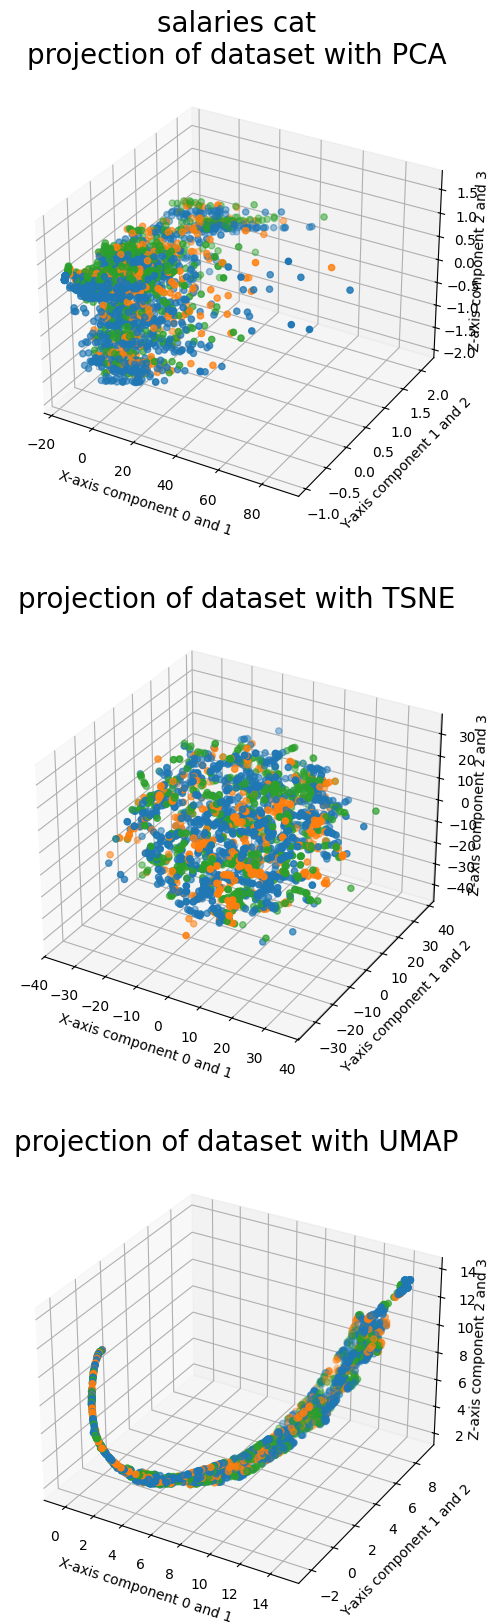

In [19]:
color_list=c=[sns.color_palette()[x] for x in df["salaries cat"].map({"Low":0, "Medium":1, "High":2})]
#plt.title('projection of the Penguin dataset 3D', fontsize=20)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(3, 1, 1, projection='3d')
x_vals = X_reduced_PCA_3D_Using_calaries_cat[:, 0:1]
y_vals = X_reduced_PCA_3D_Using_calaries_cat[:, 1:2]
z_vals = X_reduced_PCA_3D_Using_calaries_cat[:, 2:3]
ax.scatter3D(x_vals, y_vals, z_vals,c=color_list)
ax.set_title('salaries cat\nprojection of dataset with PCA', fontsize=20)

ax.set_xlabel('X-axis component 0 and 1')
ax.set_ylabel('Y-axis component 1 and 2')
ax.set_zlabel('Z-axis component 2 and 3')
ax.zaxis.labelpad=-2.7

ax = fig.add_subplot(3, 1, 2, projection='3d')

x_vals = X_embedded_TSNE_3D_Using_calaries_cat[:, 0:1]
y_vals = X_embedded_TSNE_3D_Using_calaries_cat[:, 1:2]
z_vals = X_embedded_TSNE_3D_Using_calaries_cat[:, 2:3]
ax.scatter3D(x_vals, y_vals, z_vals,c=color_list)
ax.set_title('projection of dataset with TSNE', fontsize=20)

ax.set_xlabel('X-axis component 0 and 1')
ax.set_ylabel('Y-axis component 1 and 2')
ax.set_zlabel('Z-axis component 2 and 3')
ax.zaxis.labelpad=-2.7

ax = fig.add_subplot(3, 1, 3, projection='3d')
x_vals = X_embedded_UMAP_3D_Using_calaries_cat[:, 0:1]
y_vals = X_embedded_UMAP_3D_Using_calaries_cat[:, 1:2]
z_vals = X_embedded_UMAP_3D_Using_calaries_cat[:, 2:3]


ax.scatter3D(x_vals, y_vals, z_vals,c=color_list)
ax.set_title('projection of dataset with UMAP', fontsize=20)

ax.set_xlabel('X-axis component 0 and 1')
ax.set_ylabel('Y-axis component 1 and 2')
ax.set_zlabel('Z-axis component 2 and 3')
ax.zaxis.labelpad=-2.7

if global_save_image == True :
        plt.savefig(f"{directorio_de_imagenes}/reduccion_pca_tsne_umap_3d_Salaries_cat.jpg", dpi=300, transparent=False, bbox_inches='tight')